In [1]:
import sys, os
sys.path.append(os.path.dirname(os.getcwd()))

### Dice Sample Model

In [2]:
from dice import sample

print(sample())
print(sample())
print(sample())

6
5
8


In [3]:
trial = 10000 # 샘플링 횟수
 
samples = []
for _ in range(trial):
    s = sample()
    samples.append(s)
    
V = sum(samples) / len(samples)
print(V)

6.9336


In [4]:
trial = 1000

samples = []
for _ in range(trial):
    s = sample()
    samples.append(s)
    V = sum(samples) / len(samples)
    print(V)

11.0
7.5
7.666666666666667
7.5
7.2
7.0
6.857142857142857
6.625
6.111111111111111
6.1
6.363636363636363
6.416666666666667
6.615384615384615
6.785714285714286
6.933333333333334
6.9375
6.9411764705882355
7.111111111111111
7.157894736842105
7.0
7.0
7.045454545454546
7.130434782608695
7.125
7.2
7.1923076923076925
7.222222222222222
7.071428571428571
7.0344827586206895
6.9
6.838709677419355
6.84375
6.909090909090909
6.882352941176471
6.914285714285715
7.027777777777778
7.081081081081081
7.184210526315789
7.282051282051282
7.3
7.170731707317073
7.190476190476191
7.232558139534884
7.2272727272727275
7.2444444444444445
7.239130434782608
7.25531914893617
7.1875
7.122448979591836
7.1
7.0588235294117645
7.038461538461538
6.962264150943396
7.0
7.0
6.928571428571429
6.894736842105263
6.931034482758621
6.88135593220339
6.85
6.836065573770492
6.790322580645161
6.825396825396825
6.84375
6.8
6.803030303030303
6.835820895522388
6.794117647058823
6.855072463768116
6.8
6.788732394366197
6.791666666666667
6.

In [5]:
trial = 1000
V, n = 0, 0

for _ in range(trial):
    s = sample()
    n += 1
    V += (s - V) / n # 또는 V = V + (s - V) / n
    print(V)

7.0
4.5
5.0
5.0
4.8
5.833333333333333
6.142857142857142
6.75
7.111111111111111
7.1
7.454545454545454
7.166666666666666
7.153846153846153
7.285714285714286
7.133333333333333
7.0625
6.882352941176471
6.944444444444445
6.842105263157895
6.9
6.761904761904762
6.681818181818182
6.739130434782608
6.708333333333333
6.6
6.4230769230769225
6.444444444444444
6.607142857142857
6.586206896551724
6.533333333333333
6.483870967741935
6.34375
6.454545454545454
6.411764705882352
6.542857142857143
6.527777777777778
6.648648648648648
6.63157894736842
6.512820512820512
6.549999999999999
6.487804878048779
6.4761904761904745
6.488372093023254
6.590909090909089
6.62222222222222
6.586956521739128
6.574468085106381
6.479166666666665
6.57142857142857
6.539999999999999
6.470588235294117
6.48076923076923
6.528301886792452
6.61111111111111
6.5272727272727264
6.535714285714285
6.508771929824561
6.568965517241379
6.661016949152542
6.733333333333333
6.786885245901639
6.790322580645161
6.761904761904762
6.75
6.7230769

### 3 x 4 Grid World Problem

In [6]:
from common.gridworld import GridWorld

env = GridWorld()
action = 0 # 더미 행동
next_state, reward, done = env.step(action)

print("next_state:", next_state)
print("reward:", reward)
print("done:", done)

next_state: (1, 0)
reward: 0
done: False


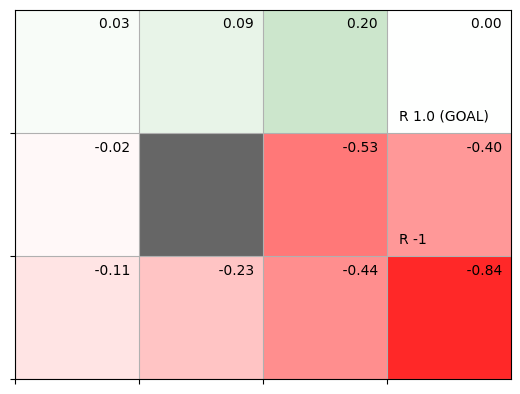

In [7]:
from mc_eval import RandomAgent

env = GridWorld()
agent = RandomAgent()

episodes = 1000

for episode in range(episodes):
    state = env.reset()
    agent.reset()
    
    while True:
        action = agent.get_action(state)            # 행동 선택
        next_state, reward, done = env.step(action) # 행동 수행
        
        agent.add(state, action, reward)
        if done:
            agent.eval()
            break
        
        state = next_state
        
env.render_v(agent.V)

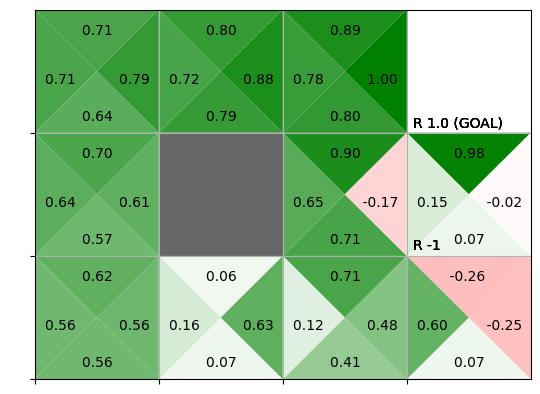

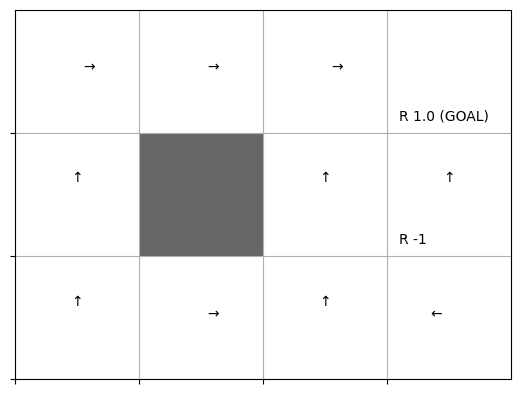

In [8]:
from mc_control import MCAgent

env = GridWorld()
agent = MCAgent()

episodes = 10000
for episode in range(episodes):
    state = env.reset()
    agent.reset()
    
    while True:
        action = agent.get_action(state)
        next_state, reward, done = env.step(action)
        
        agent.add(state, action, reward)
        if done:
            agent.update()
            break
        
        state = next_state
        
env.render_q(agent.Q)

### Importance Sampling

In [9]:
import numpy as np


x = np.array([1, 2, 3])         # 확률 변수
pi = np.array([0.1, 0.1, 0.8])  # 확률 분포

# 기댓값의 참값 계산
e = np.sum(x * pi)
print("참값(E_pi[x]):", e)

# 몬테카를로법으로 계산
n = 100
samples = []
for _ in range(n):
    s = np.random.choice(x, p=pi)   # pi를 이용한 샘플링
    samples.append(s)
    
mean = np.mean(samples) # 샘플들의 평귱
var = np.var(samples)   # 샘플들의 분산
print(f"몬테카를로법: {mean:.2f} (분산: {var:.2f})")

참값(E_pi[x]): 2.7
몬테카를로법: 2.70 (분산: 0.37)


In [10]:
b = np.array([1/3, 1/3, 1/3])   # 확률 분포
n = 100 # 샘플 개수
samples = []

for _ in range(n):
    idx = np.arange(len(b))         # b의 인덱스 ([0, 1, 2])
    i = np.random.choice(idx, p=b)  # b를 사용하여 샘플링
    s = x[i]    
    rho = pi[i] / b[i]              # 가중치
    samples.append(rho * s)         # 샘플 데이터에 가중치를 곱해 저장
    
mean = np.mean(samples)
var = np.var(samples)
print(f"중요도 샘플링: {mean:.2f} (분산: {var:.2f})")

중요도 샘플링: 2.82 (분산: 10.36)


In [11]:
b = np.array([0.2, 0.2, 0.6])
n = 100
samples = []

for _ in range(n):
    idx = np.arange(len(b))
    i = np.random.choice(idx, p=b)
    s = x[i]
    rho = pi[i] / b[i]
    samples.append(rho * s)
    
mean = np.mean(samples)
var = np.var(samples)
print(f"중요도 샘플링: {mean:.2f} (분산: {var:.2f})")

중요도 샘플링: 2.62 (분산: 2.66)
